## Network Science Lab 5 solution

### Numerical solution of an initial value problem
When analyzing dynamics on networks, we frequently work with systems of ordinary differential equations (one equation for each node). The graph diffusion equation is a system of linear constant coefficient equations which can be solved in terms of the eigenvalues and eigenvectors of the graph Laplacian. Such an approach will not work for variable-coefficient and nonlinear ODEs. Instead, we can use computational routines which take the initial condition as input and compute approximate solutions at later times. In this lab, you will use the *solve_ivp* function to solve a system of two equations. These equations have a simple analytical solution which you can use to test your numerical result, but keep in mind that the same approach could be used for more complicated equations.

Familiarize yourself with the *solve_ivp* function. The documentation for the function is here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
Note that there are three required input variables: func, y0 and t. 

You will now use *solve_ivp* from scipy.integrate to solve the following IVP:

$\frac{dy_1}{dt} =  sin( \omega t) $

$\frac{dy_2}{dt} = y_1 - y_2$

$y_1(0)=1, ~ y_2(0)=0$

and $\omega$ is a parameter that must be specified

1) Create a function named RHS which takes t,y, and $\omega$ as input and returns dy/dt. Note that y and dy/dt should each contain two elements

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#Add code here
def RHS(t,y,w):
    dydt = [0,0]
    dydt[0] = np.sin(w*t)
    dydt[1] = y[0] - y[1]
    return dydt

2) Now, (a) set the variable, y0, to the initial condition, (b) assign a value to $\omega$, and (c) create an array of times, t (starting at zero) at which the solution will be computed (y0 should contain two elements).

In [11]:
#Add code here
y0 = (1,0)
w = 1
t = np.linspace(0,4*np.pi/w,101)

3) If the previous tasks have been completed correctly, the code below will solve the IVP and return the solution in the array, y

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
sol = solve_ivp(RHS,[t[0],t[-1]],y0,args=(w,),t_eval = t,method='BDF')
y = sol.y

4) What are the dimensions of y? Plot your solution for $y_i(t)$. Compute the error, $\epsilon(t) = |y_2-y_{2,exact}|$. Is it what you expect? Can you reduce it? For this last question, it may be helpful to look at the online documentation for *solve_ivp*. 

The exact solution for $y_1$ is, $y_1 = -cos(\omega t)/\omega +1+1/\omega$.
The solution for $y_2$ can be found using an integrating factor and integration by parts: $d/dt(y_2 e^t) = e^t(-cos(\omega t)/\omega +1+1/\omega)$

$y_2 e^t = \int_0^t(e^t(-cos(\omega t)/\omega +1 +1/\omega)dt= -1/\omega\int_0^t e^t cos(\omega t) dt +(1 +1/\omega)(e^t-1)$

$y_2 = (1+1/\omega)(1-e^{-t}) -1/(1+\omega^2)(sin(\omega t) + cos(\omega t)/\omega) +e^{-t}/[\omega (1+\omega^2)]$

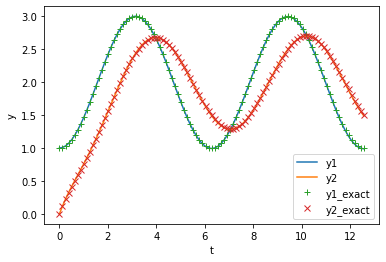

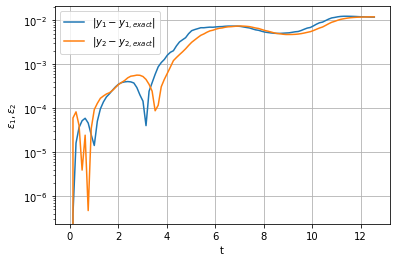

In [16]:
#Add code here
plt.figure()
plt.plot(t,y[0,:],label='y1')
plt.plot(t,y[1,:],label='y2')
plt.xlabel('t')
plt.ylabel('y')
y1_exact = -np.cos(w*t)/w+1/w+1
y2_exact = (1+1/w)*(1-np.exp(-t)) -1/(1+w**2)*(np.sin(w*t)+np.cos(w*t)/w)+np.exp(-t)/(w*(1+w**2))
plt.plot(t,y1_exact,'+',label='y1_exact')
plt.plot(t,y2_exact,'x',label='y2_exact')
plt.legend()

#Compute and display error for y1 and y2
error1 = np.abs(y[0,:]-y1_exact)
error2 = np.abs(y[1,:]-y2_exact)

plt.figure()
plt.semilogy(t,error1, label=r'$|y_1-y_{1,exact}|$')
plt.semilogy(t,error2, label=r'$|y_2-y_{2,exact}|$')
plt.xlabel('t')
plt.ylabel(r'$\epsilon_1, \epsilon_2$')
plt.grid()
plt.legend()

Adjusting the error tolerances via the call to solve_ivp will change the error (and the walltime):

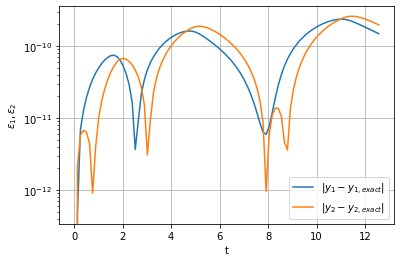

In [19]:
sol = solve_ivp(RHS,[t[0],t[-1]],y0,args=(w,),t_eval = t,method='BDF',rtol=1e-12,atol=1e-12)
y = sol.y

y1_exact = -np.cos(w*t)/w+1/w+1
y2_exact = (1+1/w)*(1-np.exp(-t)) -1/(1+w**2)*(np.sin(w*t)+np.cos(w*t)/w)+np.exp(-t)/(w*(1+w**2))


#Compute and display error for y1 and y2
error1 = np.abs(y[0,:]-y1_exact)
error2 = np.abs(y[1,:]-y2_exact)

plt.figure()
plt.semilogy(t,error1, label=r'$|y_1-y_{1,exact}|$')
plt.semilogy(t,error2, label=r'$|y_2-y_{2,exact}|$')
plt.xlabel('t')
plt.ylabel(r'$\epsilon_1, \epsilon_2$')
plt.grid()
plt.legend()